In [4]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.53.0-cp39-cp39-win_amd64.whl (4.0 MB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached ml_dtypes-0.0.4-cp39-cp39-win_amd64.whl (97 kB)
  Using cached google_auth-2.17.1-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


In [3]:
# !pip install --upgrade tensorflow-gpu --user

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ASUS\AppData\Local\Temp\pip-install-gozemdul\tensorflow-gpu_be45c536543f433e8d86a9db45f70e4e\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

In [21]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [51]:

#created variales for images size
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [52]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("MangoLeaf_data",
shuffle =True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size= BATCH_SIZE
)

Found 3107 files belonging to 7 classes.


In [53]:
class_names=dataset.class_names
class_names

['Bacterial_Canker',
 'Healthy  leaf',
 'Healthy leaf',
 'Sooty Mould  Leaf',
 'Sooty Mould leaf',
 'anthracnose  leaf',
 'anthracnose leaf']

In [25]:
len(dataset)

98

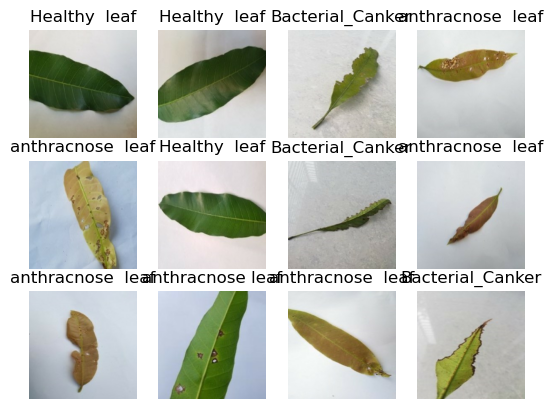

In [26]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        #to turn off the axis points
        plt.axis("off")
        
    

In [27]:
#SPLITTING DATASET
#80 for training
# 20 for validation
#10 for tetsing
train_size=0.8
len(dataset)*train_size


78.4

In [28]:
train_ds=dataset.take(54)
len(train_ds)

54

In [29]:
test_ds=dataset.skip(54)
len(test_ds)

44

In [30]:
val_size=0.1
len(dataset)*val_size

9.8

In [31]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [32]:
test_ds=test_ds.skip(6)
len(test_ds)

38

In [33]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [34]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [35]:
len(train_ds)

78

In [36]:
len(val_ds)

9

In [37]:
len(test_ds)

11

In [38]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [39]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [40]:
#Data Augmentation
#Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [41]:
#Applying Data Augmentation to Train Dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 7

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.build(input_shape=input_shape)


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
78/78 [==============================] - 189s 2s/step - loss: 1.6387 - accuracy: 0.3150 - val_loss: 1.1703 - val_accuracy: 0.5729
Epoch 2/25
78/78 [==============================] - 170s 2s/step - loss: 1.0525 - accuracy: 0.5946 - val_loss: 0.8175 - val_accuracy: 0.7014
Epoch 3/25
78/78 [==============================] - 168s 2s/step - loss: 0.8678 - accuracy: 0.6482 - val_loss: 0.9699 - val_accuracy: 0.5799
Epoch 4/25
78/78 [==============================] - 169s 2s/step - loss: 0.6573 - accuracy: 0.7446 - val_loss: 0.5924 - val_accuracy: 0.7639
Epoch 5/25
78/78 [==============================] - 168s 2s/step - loss: 0.5506 - accuracy: 0.7742 - val_loss: 0.5726 - val_accuracy: 0.7743
Epoch 6/25
78/78 [==============================] - 169s 2s/step - loss: 0.5763 - accuracy: 0.7722 - val_loss: 0.4520 - val_accuracy: 0.8438
Epoch 7/25
78/78 [==============================] - 169s 2s/step - loss: 0.4830 - accuracy: 0.8034 - val_loss: 0.4050 - val_accuracy: 0.8681
Epoch 8/25
78

In [26]:
scores = model.evaluate(test_ds)

11/11 [==============================] - 18s 416ms/step - loss: 0.1893 - accuracy: 0.9233


In [27]:
scores

[0.18925894796848297, 0.9232954382896423]

In [28]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 78}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
type(history.history['loss'])

list

In [31]:
len(history.history['loss'])

25

In [32]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.6386758089065552,
 1.052475094795227,
 0.8678376078605652,
 0.657272458076477,
 0.5506325364112854]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

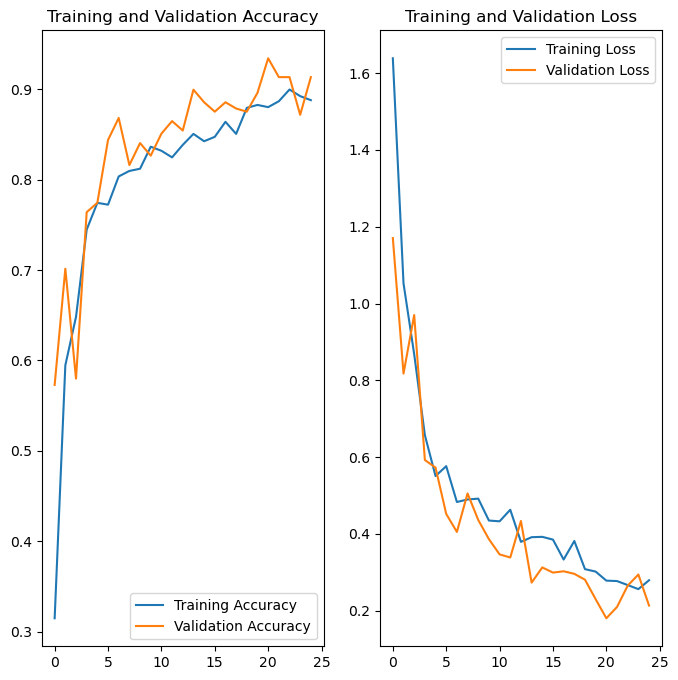

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(25), acc, label='Training Accuracy')
plt.plot(range(25), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(25), loss, label='Training Loss')
plt.plot(range(25), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Healthy leaf
1/1 [==============================] - 0s 347ms/step
predicted label: Healthy leaf


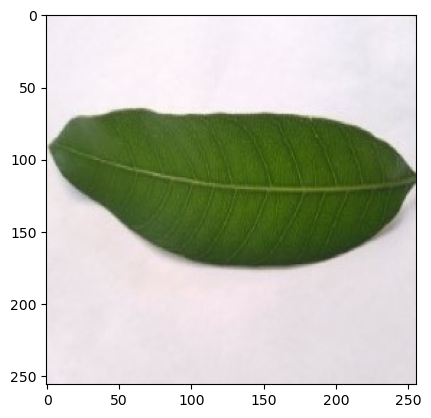

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 60ms/step


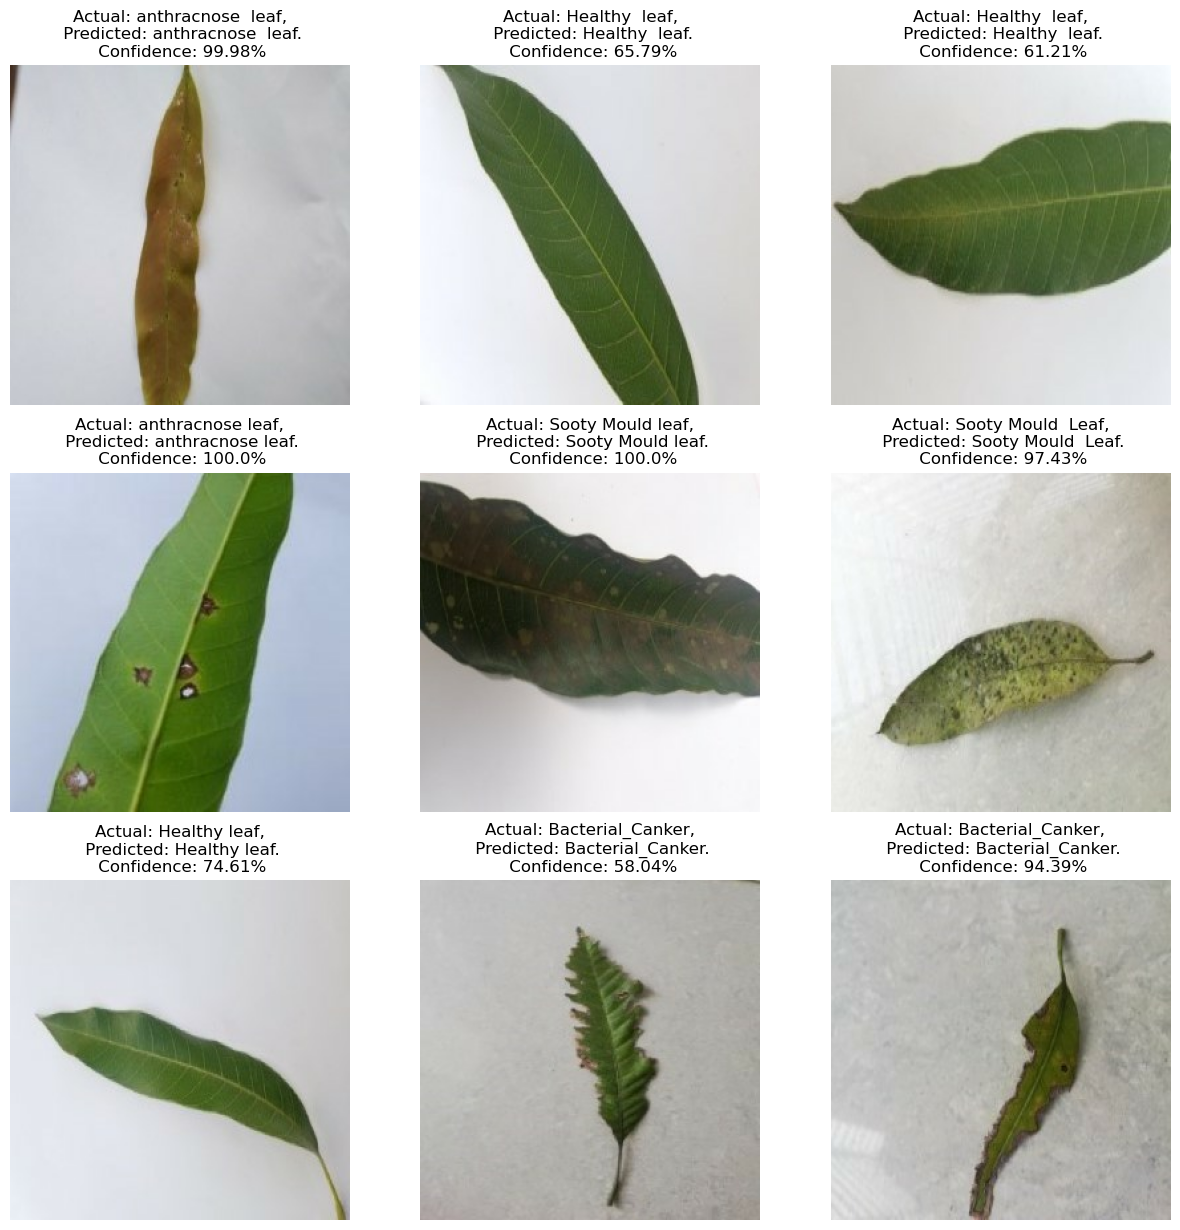

In [56]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [45]:
model.save("../saved_model.h5")


In [57]:
import numpy as np
from keras.models import load_model

# Load the saved model
model = load_model("C:/Users/ASUS/Downloads/Major_Project1/model.h5")


first image to predict
actual label: Sooty Mould  Leaf
1/1 [==============================] - 1s 902ms/step
predicted label: Sooty Mould  Leaf


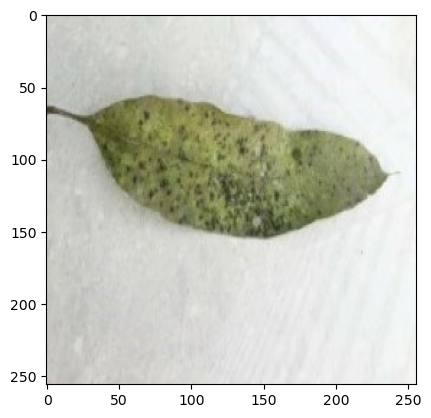

In [58]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [13]:
# import matplotlib.cm as cm

In [14]:
# from IPython.display import Image,display

In [ ]:
# def save_and_display_gradcam(img_path,cam_path=):

In [17]:
# def imag_prediction_and_visualization(past,last_conv_layer_name="conv2d_93",model=model):
#     img=img_to_array(path)
#     heatmap=make_gradcam_heatmap(img_array,model,last_conv_layer_name)
    
#     plt.title("the heatmap img")
#     plt.imshow(heatmap)
#     plt.show()
    
    
#     pred=np.argmax(model.predict(preprocess_input(img_array)))
#     print()
#     print()
#     print()
    
#     save_and_display_gradcam(path,heatmap)
    
#     print("original img")
    
#     a=plt.imread(path)
#     plt.imshow(a,cmap="gray")
#     plt.title("original image")
#     plt.show()